In [1]:
from model import *
from data import *
import matplotlib.pyplot as plt
import time

In [2]:
outs = {
    'predict':[],
    'estimated_error':[],
    'exe_time':[]
}
model = FourierGabor(nclusters=3, nbins=50, opening=10, dilation=5)
total = len(DS)
for i, filename in enumerate(DS.filename):
    tic = time.process_time()
    area, error = model.predict(get(filename), True)
    outs['exe_time'].append(time.process_time() - tic)
    outs['predict'].append(area)
    outs['estimated_error'].append(error)
    pi = int(np.mean(outs['exe_time']))
    et = int((total-i)*pi)
    print(f'{filename}\t{i+1}/{total}\t{(i/total*100):.2f}%\tPI:{pi}s\tET:{et//60}:{et%60}', end='\r')

In [3]:
dss = pd.concat([DS, pd.DataFrame(outs)], axis=1).sort_values('area', ignore_index=True)
dss['error'] = dss.area - dss.predict
dss['error_rel'] = np.abs(dss.error)/dss.area*100

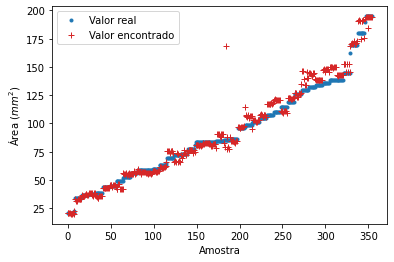

In [4]:
plt.plot(dss.area, '.', label='Valor real')
plt.plot(dss.predict, '+', c='tab:red', label='Valor encontrado', lw=0.7)
plt.ylabel(r'Área ($mm^2$)')
plt.xlabel('Amostra')
plt.legend()
plt.show()

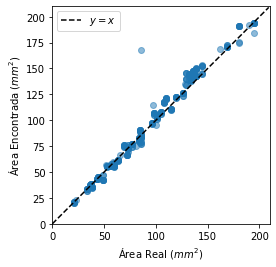

In [5]:
fig, ax = plt.subplots()
plt.plot(dss.area, dss.predict, 'o', alpha=0.5)
ax.set_aspect('equal', 'box')
plt.xlim(0, 210)
plt.ylim(0, 210)
plt.xlabel(r'Área Real ($mm^2$)')
plt.ylabel(r'Área Encontrada ($mm^2$)')
plt.plot(np.arange(0, 210), 'k--', label=r'$y=x$')
plt.legend()
plt.show()

In [6]:
dss.error_rel.describe()

count    355.000000
mean       4.629711
std        5.892771
min        0.121499
25%        1.896272
50%        3.266587
75%        7.025987
max       96.587042
Name: error_rel, dtype: float64

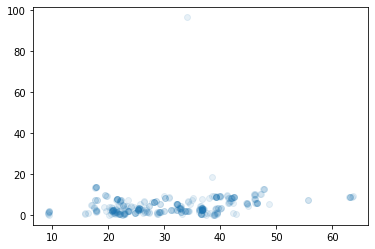

In [7]:
plt.plot(dss.estimated_error, dss.error_rel, 'o', alpha=0.1)

In [8]:
dss[dss.error_rel > 50]

,filename,area,predict,estimated_error,exe_time,error,error_rel
184,324.jpg,85.547,168.174316,34.106842,3.796875,-82.627316,96.587042


In [10]:
dss.exe_time.describe()

count    355.000000
mean       4.270951
std        2.471319
min        1.281250
25%        3.351562
50%        3.921875
75%        4.945312
max       17.468750
Name: exe_time, dtype: float64

In [14]:
dss.to_csv('dss_predict.csv', index=False)